<a href="https://colab.research.google.com/github/adhang/data-science-digitalskola/blob/update/12.%20Intermediate%20Statistics/Learn%20-%20Intermediate%20Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Statistics
Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___
**Contents**
- Importing Libraries
- Reading Dataset
- Probability
  - Probability Mass Function
  - Cumulative Distribution Function
- Distribution & Skewness
- Correlation
- Statistical Analysis
  - Low Correlation
  - High Correlation
  - Handling Outlier

# Importing Libraries

In [ ]:
!pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.6.2-py3-none-any.whl size=10736 sha256=33f803987248b4d7d1f0a3763f996c788796643effaeceb0ec3c1e4dd69bfcf9
  Stored in directory: /root/.cache/pip/wheels/34/22/5f/9ba9db604d08670e283b2e04551dd407f44cf889fdb9617ce5
Successfully built empiricaldist


In [ ]:
# import library
import pandas as pd
import numpy as np
from empiricaldist import Pmf, Cdf

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Reading Dataset

In [ ]:
# read the dataset
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv')
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


# Probability

## Probability Mass Function

In [ ]:
# using pandas library
data['Gender'].value_counts(normalize=True)

Male      0.817048
Female    0.182952
Name: Gender, dtype: float64

In [ ]:
# using empiricaldist library
PMF_gender = Pmf.from_seq(data['Gender'], normalize=True)
PMF_gender = pd.DataFrame({'Gender':PMF_gender.index, 'PMF':PMF_gender.values})
PMF_gender

,Gender,PMF
0,Female,0.182952
1,Male,0.817048


In [ ]:
px.bar(PMF_gender, x='Gender', y='PMF', width=750, height=550)

In [ ]:
Pmf.from_seq(data['Education'], normalize=True)

,probs
Graduate,0.790224
Not Graduate,0.209776


## Cumulative Distribution Function

In [ ]:
Pmf.from_seq(data['LoanAmount'], normalize=True)

,probs
17.0,0.002105
25.0,0.004211
26.0,0.002105
30.0,0.004211
35.0,0.002105
...,...
495.0,0.002105
500.0,0.002105
600.0,0.004211
650.0,0.002105


In [ ]:
PMF_loan_amt = Pmf.from_seq(data['LoanAmount'], normalize=True)
PMF_loan_amt = pd.DataFrame({'LoanAmount':PMF_loan_amt.index, 'PMF':PMF_loan_amt.values})

px.bar(PMF_loan_amt, x='LoanAmount', y='PMF', width=600, height=400)

In [ ]:
PMF_loan_amt_term = Pmf.from_seq(data['Loan_Amount_Term'], normalize=True)
PMF_loan_amt_term = pd.DataFrame({'Loan_Amount_Term':PMF_loan_amt_term.index, 'PMF':PMF_loan_amt_term.values})

px.bar(PMF_loan_amt_term, x='Loan_Amount_Term', y='PMF', width=600, height=400)

In [ ]:
CDF_loan_amt_term = Cdf.from_seq(data['Loan_Amount_Term'], normalize=True)
CDF_loan_amt_term = pd.DataFrame({'Loan_Amount_Term':CDF_loan_amt_term.index, 'CDF':CDF_loan_amt_term.values})

px.line(CDF_loan_amt_term, x='Loan_Amount_Term', y='CDF', width=600, height=400)

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Bar(x=PMF_loan_amt_term['Loan_Amount_Term'], y=PMF_loan_amt_term['PMF']), row=1, col=1
)

fig.add_trace(
    go.Line(x=CDF_loan_amt_term['Loan_Amount_Term'], y=CDF_loan_amt_term['CDF']), row=1, col=2
)

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




# Distributon & Skewness

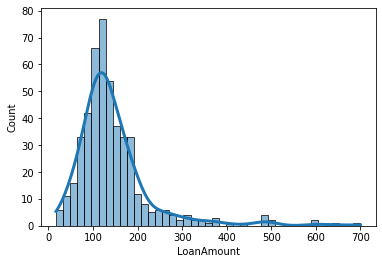

In [ ]:
sns.histplot(data=data, x='LoanAmount', kde=True, line_kws={'linewidth':3})
plt.show()

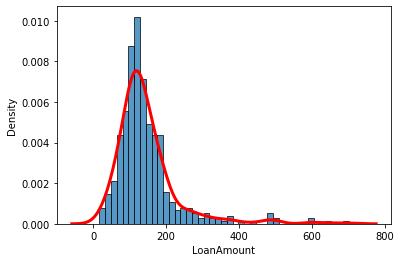

In [ ]:
sns.histplot(data=data, x='LoanAmount', stat="density")
sns.kdeplot(data=data, x='LoanAmount', color="red", linewidth=3)
plt.show()

In [ ]:
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Unnamed: 0           0.000000
ApplicantIncome      6.784750
CoapplicantIncome    8.390974
LoanAmount           2.795423
Loan_Amount_Term    -2.306812
Credit_History      -1.947450
Loan_Status         -0.868134
dtype: float64

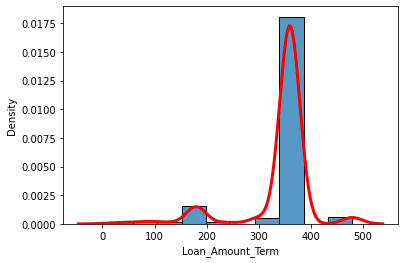

In [ ]:
sns.histplot(data=data, x='Loan_Amount_Term', stat="density")
sns.kdeplot(data=data, x='Loan_Amount_Term', color="red", linewidth=3)
plt.show()

# Correlation

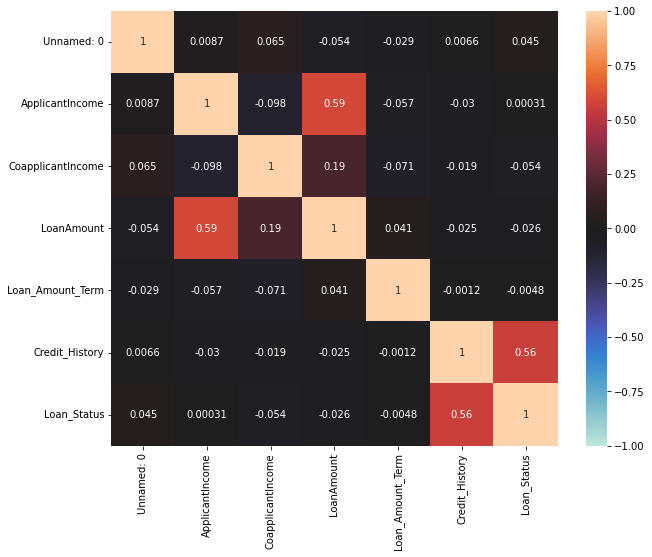

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, center=0, vmin=-1, vmax=1)
plt.show()

# Statistical Analysis

## Low Correlation

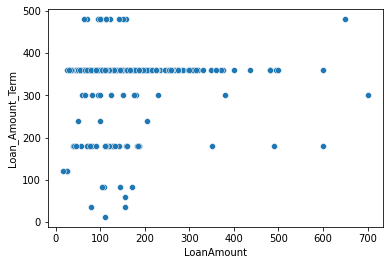

In [ ]:
sns.scatterplot(data=data, x='LoanAmount', y='Loan_Amount_Term')
plt.show()

## High Correlation

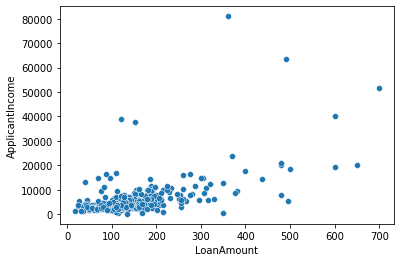

In [ ]:
sns.scatterplot(data=data, x='LoanAmount', y='ApplicantIncome')
plt.show()

## Handling Outlier

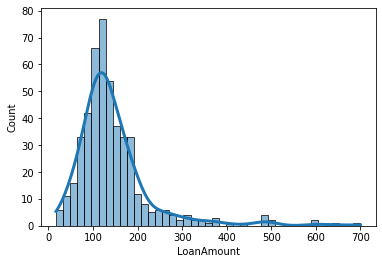

In [ ]:
sns.histplot(data=data, x='LoanAmount', kde=True, line_kws={'linewidth':3})
plt.show()

In [ ]:
data['LoanAmount'].skew()

2.7954233031586915

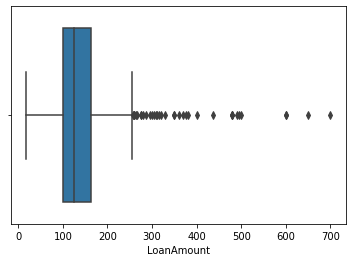

In [ ]:
sns.boxplot(data=data, x='LoanAmount')
plt.show()

In [ ]:
Q1 = data['LoanAmount'].quantile(0.25)
Q3 = data['LoanAmount'].quantile(0.75)

IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

In [ ]:
non_outlier = data[(data['LoanAmount'] >= lower) & (data['LoanAmount'] <= upper)]
non_outlier

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,486,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,1
487,487,LP001790,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,1
488,488,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,1
489,489,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,0


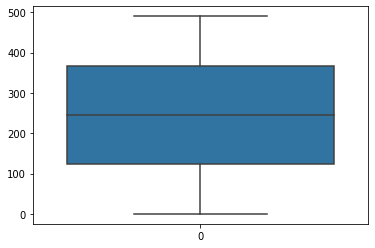

In [ ]:
non_outlier = np.where((data['LoanAmount'] >= lower) & (data['LoanAmount'] <= upper))
sns.boxplot(data=non_outlier)
plt.show()